In [1]:
# !pip install "protobuf<4.21.0"

In [2]:
import os
import pandas as pd
import kagglehub

# 1. Setup Data (Safety Check)
try:
    if not os.path.exists(TRAIN_DIR): raise NameError
except NameError:
    path = kagglehub.dataset_download("ashishmotwani/tomato")
    TRAIN_DIR = os.path.join(path, 'train')
    VALID_DIR = os.path.join(path, 'valid')

# 2. Function to count images
def count_images(dir_path):
    if not os.path.exists(dir_path): return {}
    return {cls: len(os.listdir(os.path.join(dir_path, cls))) for cls in os.listdir(dir_path)}

train_counts = count_images(TRAIN_DIR)
valid_counts = count_images(VALID_DIR)

# 3. Build Data Structure
all_classes = sorted(list(set(train_counts.keys()) | set(valid_counts.keys())))
data = []

for idx, class_name in enumerate(all_classes):
    t_count = train_counts.get(class_name, 0)
    v_count = valid_counts.get(class_name, 0)
    total = t_count + v_count
    
    # Matching the column order from your picture:
    # Class ID | Class Name | Number of Data | Training | Validating
    data.append([f"Class {idx}", class_name, total, t_count, v_count])

# 4. Create DataFrame with Specific Columns
columns = ["Class ID", "Class Name", "Number of Data", "Training", "Validating"]
df = pd.DataFrame(data, columns=columns)

# 5. Add TOTAL Row
total_row = ["", "Total", df["Number of Data"].sum(), df["Training"].sum(), df["Validating"].sum()]
df.loc[len(df)] = total_row

# 6. Print Output (Text Format)
print("Table 1: The dataset description for tomato leaf disease.")
print("-" * 85)
print(df.to_string(index=False))
print("-" * 85)

Table 1: The dataset description for tomato leaf disease.
-------------------------------------------------------------------------------------
Class ID                           Class Name  Number of Data  Training  Validating
 Class 0                       Bacterial_spot            3558      2826         732
 Class 1                         Early_blight            3098      2455         643
 Class 2                          Late_blight            3905      3113         792
 Class 3                            Leaf_Mold            3493      2754         739
 Class 4                   Septoria_leaf_spot            3628      2882         746
 Class 5 Spider_mites Two-spotted_spider_mite            2182      1747         435
 Class 6                          Target_Spot            2284      1827         457
 Class 7        Tomato_Yellow_Leaf_Curl_Virus            2537      2039         498
 Class 8                  Tomato_mosaic_virus            2737      2153         584
 Class 9        

✅ Saved 'Dataset_Distribution_Sorted_With_Numbers.png'

--- Sorted Dataset Summary ---
                           Disease Class  Total Images
0                            Late_blight          3905
1                                healthy          3856
2                     Septoria_leaf_spot          3628
3                         Bacterial_spot          3558
4                              Leaf_Mold          3493
5                           Early_blight          3098
6                    Tomato_mosaic_virus          2737
7          Tomato_Yellow_Leaf_Curl_Virus          2537
8                            Target_Spot          2284
9   Spider_mites Two-spotted_spider_mite          2182
10                        powdery_mildew          1256
Total Images: 32534


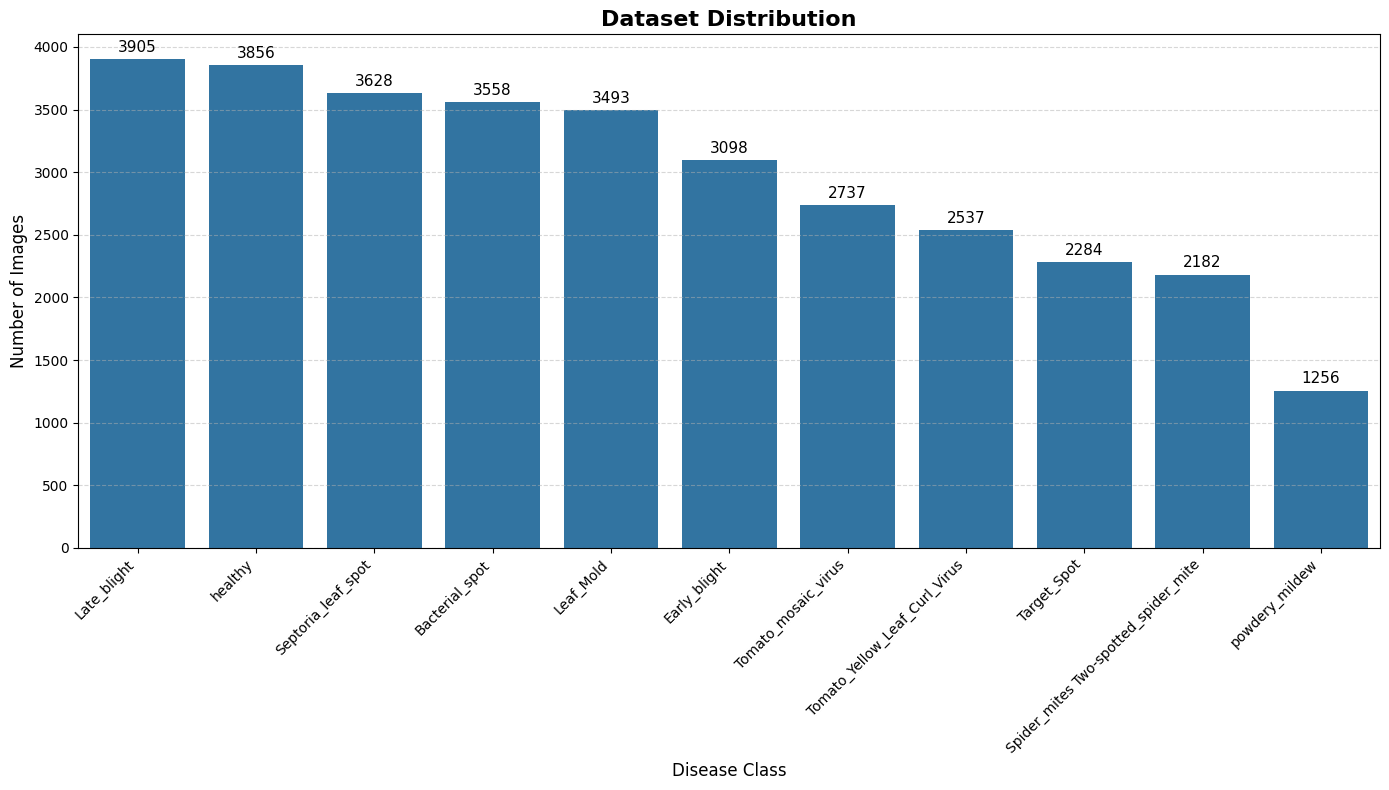

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# 1. Setup Data (Safety Check)
try:
    if not os.path.exists(TRAIN_DIR): raise NameError
except NameError:
    path = kagglehub.dataset_download("ashishmotwani/tomato")
    TRAIN_DIR = os.path.join(path, 'train')
    VALID_DIR = os.path.join(path, 'valid')

# 2. Get Counts
def count_images(dir_path):
    if not os.path.exists(dir_path): return {}
    return {cls: len(os.listdir(os.path.join(dir_path, cls))) for cls in os.listdir(dir_path)}

train_counts = count_images(TRAIN_DIR)
valid_counts = count_images(VALID_DIR)

# 3. Create DataFrame
data = []
all_classes = sorted(list(set(train_counts.keys()) | set(valid_counts.keys())))

for cls in all_classes:
    total = train_counts.get(cls, 0) + valid_counts.get(cls, 0)
    data.append([cls, total])

df = pd.DataFrame(data, columns=["Disease Class", "Total Images"])

# --- SORTING HIGH TO LOW ---
df = df.sort_values(by='Total Images', ascending=False).reset_index(drop=True)

# 4. Plot Sorted Blue Bar Chart with Numbers
plt.figure(figsize=(14, 8)) # Slightly larger for clarity
ax = sns.barplot(x="Disease Class", y="Total Images", data=df, color="#1f77b4") # Standard Blue

# --- THE ADDITION: Add Numbers on Top of Bars ---
ax.bar_label(ax.containers[0], fontsize=11, padding=3)

plt.title("Dataset Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Disease Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save
plt.savefig('Dataset_Distribution_Sorted_With_Numbers.png')
print(f"✅ Saved 'Dataset_Distribution_Sorted_With_Numbers.png'")

# Display Table
print("\n--- Sorted Dataset Summary ---")
print(df)
print(f"Total Images: {df['Total Images'].sum()}")

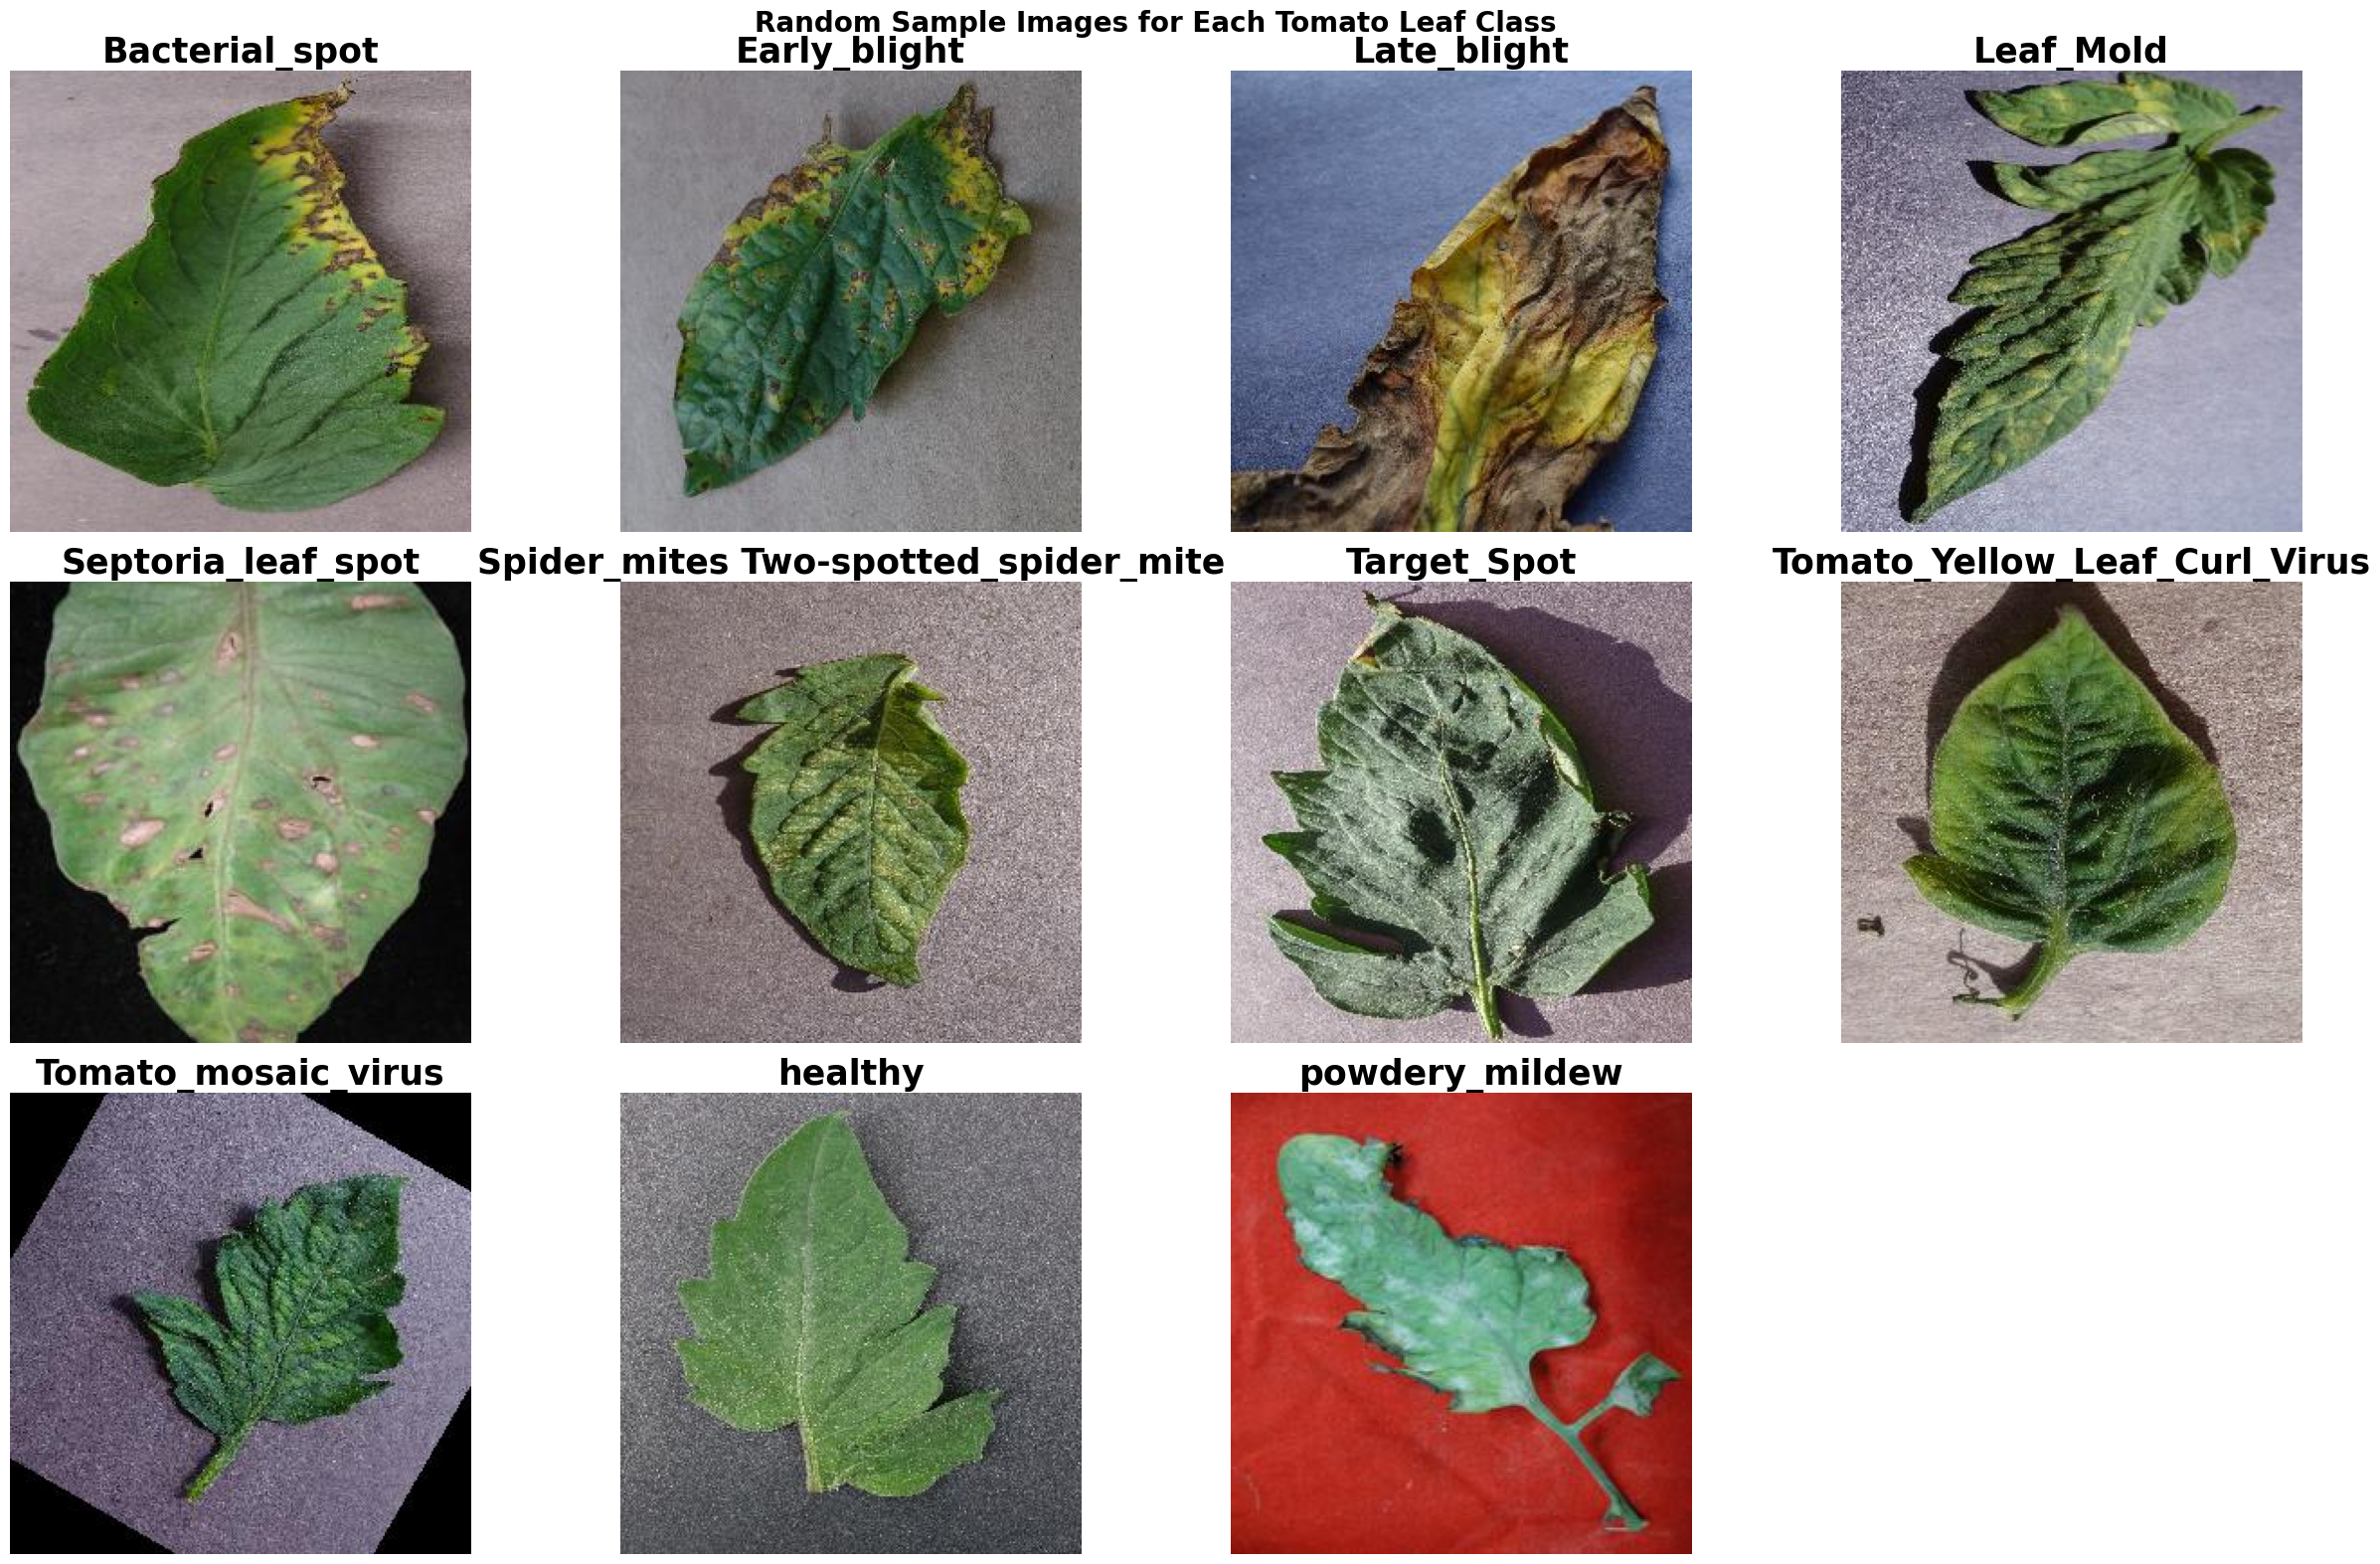

✅ Saved 'Random_Samples_LargeFont.png' with larger text.


In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import kagglehub

# --- CONFIGURATION ---
# Re-define path just in case variables were lost
try:
    if not os.path.exists(VALID_DIR): raise NameError
except NameError:
    path = kagglehub.dataset_download("ashishmotwani/tomato")
    VALID_DIR = os.path.join(path, 'valid')

# 1. Setup the Plot
classes = sorted(os.listdir(VALID_DIR))
plt.figure(figsize=(25, 16)) # Made figure slightly larger
plt.suptitle("Random Sample Images for Each Tomato Leaf Class", fontsize=20, weight='bold') # Increased Main Title

# 2. Loop through classes
for i, class_name in enumerate(classes):
    class_path = os.path.join(VALID_DIR, class_name)
    
    if os.path.isdir(class_path):
        # Pick random image
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)
        
        # Load and Plot
        img = mpimg.imread(img_path)
        
        # Create subplot (3 rows, 4 columns)
        plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        
        # --- THE FIX: Increased fontsize ---
        plt.title(class_name, fontsize=25, weight='bold') 
        plt.axis('off')

plt.tight_layout()
plt.savefig('Random_Samples_LargeFont.png')
plt.show()

print("✅ Saved 'Random_Samples_LargeFont.png' with larger text.")

In [5]:
import kagglehub
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np

# 1. Download Data
print("⬇️ Downloading Dataset...")
path = kagglehub.dataset_download("ashishmotwani/tomato")
print("✅ Dataset downloaded to:", path)

# 2. Define Paths & Settings (GLOBAL VARIABLES)
TRAIN_DIR = os.path.join(path, 'train')
VALID_DIR = os.path.join(path, 'valid')
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15

print(f"\n📂 Training Path: {TRAIN_DIR}")
print(f"📂 Validation Path: {VALID_DIR}")
print("✅ Cell 1 Complete. Variables set.")

2025-11-29 03:49:47.472090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764388187.643869      93 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764388187.693577      93 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


⬇️ Downloading Dataset...
✅ Dataset downloaded to: /kaggle/input/tomato

📂 Training Path: /kaggle/input/tomato/train
📂 Validation Path: /kaggle/input/tomato/valid
✅ Cell 1 Complete. Variables set.


In [6]:
import tensorflow as tf
# This checks if TensorFlow can actually see the GPU
gpus = tf.config.list_physical_devices('GPU')
print(f"\nSUCCESS: TensorFlow found {len(gpus)} GPU(s).")
if len(gpus) > 0:
    print("Ignore the red warnings. Your GPU is working.")


SUCCESS: TensorFlow found 1 GPU(s).
Ignore the red warnings. Your GPU is working.


In [7]:
def glcam_block(inputs, reduction_ratio=16):
    channels = inputs.shape[-1]
    
    # Global Branch
    g_x = layers.GlobalAveragePooling2D(keepdims=True)(inputs)
    g_x = layers.Conv2D(channels // reduction_ratio, 1, padding='same')(g_x)
    g_x = layers.BatchNormalization()(g_x)
    g_x = layers.Activation('gelu')(g_x)
    g_x = layers.Conv2D(channels, 1, padding='same')(g_x)
    g_x = layers.BatchNormalization()(g_x)

    # Local Branch
    q_x = layers.Conv2D(channels // reduction_ratio, 1, padding='same')(inputs)
    q_x = layers.BatchNormalization()(q_x)
    q_x = layers.Activation('gelu')(q_x)
    q_x = layers.Conv2D(channels, 1, padding='same')(q_x)
    q_x = layers.BatchNormalization()(q_x)

    # Combine
    aggregated = layers.Add()([g_x, q_x])
    weights = layers.Activation('sigmoid')(aggregated)
    return layers.Multiply()([inputs, weights])

def se_block(inputs, reduction=16):
    channels = inputs.shape[-1]
    x = layers.GlobalAveragePooling2D()(inputs)
    x = layers.Dense(channels // reduction, activation='relu')(x)
    x = layers.Dense(channels, activation='sigmoid')(x)
    x = layers.Reshape((1, 1, channels))(x)
    return layers.Multiply()([inputs, x])

print("✅ Cell 2 Complete. Attention blocks defined.")

✅ Cell 2 Complete. Attention blocks defined.


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications, optimizers

def build_hybrid_tomatonet(num_classes, use_glcam=False):
    inputs = layers.Input(shape=(224, 224, 3))
    
    # 1. Backbone: EfficientNetB0 (Pre-trained on ImageNet)
    # We set 'include_top=False' to remove the original classifier
    base_model = applications.EfficientNetB0(
        include_top=False, 
        weights='imagenet', 
        input_tensor=inputs
    )
    
    # FREEZE BACKBONE: This keeps the pre-trained knowledge safe
    base_model.trainable = False 
    
    # 2. Feature Extraction Points
    # We grab features from 3 different depths of the network
    layer_names = ['block2a_activation', 'block3a_activation', 'top_activation']
    outputs = [base_model.get_layer(name).output for name in layer_names]
    
    feature_extractor = models.Model(inputs=base_model.input, outputs=outputs)
    f_early, f_inter, f_deep = feature_extractor(inputs)
    
    # 3. Attention Mechanism (The Logic Switch)
    if use_glcam:
        # Proposed Method: Global-Local Context Attention
        a1 = glcam_block(f_early)
        a2 = glcam_block(f_inter)
        a3 = glcam_block(f_deep)
        model_name = "GLCAM-Net"
    else:
        # Baseline Method: Squeeze-and-Excitation
        a1 = se_block(f_early)
        a2 = se_block(f_inter)
        a3 = se_block(f_deep)
        model_name = "SE-Net"
        
    # 4. Feature Fusion
    p1 = layers.GlobalAveragePooling2D()(a1)
    p2 = layers.GlobalAveragePooling2D()(a2)
    p3 = layers.GlobalAveragePooling2D()(a3)
    
    # Concatenate features from all 3 levels
    x = layers.Concatenate()([p1, p2, p3])
    
    # 5. Final Classification Head
    x = layers.Dropout(0.5)(x) # Prevents overfitting
    final_output = layers.Dense(num_classes, activation='softmax')(x)
    
    # Create the Model
    model = models.Model(inputs, final_output, name=model_name)
    
    # --- MODEL COMPILATION (The Important Part) ---
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001), # Learning Rate
        loss='categorical_crossentropy',                # Loss Function for Multi-Class
        metrics=['accuracy']                            # Metric to watch
    )
    
    return model

print("✅ Model Builder & Compiler Ready.")

✅ Model Builder & Compiler Ready.


🚀 Starting Training using: /kaggle/input/tomato/train
⏳ Loading Data (Corrected Range 0-255)...
Found 25851 images belonging to 11 classes.
Found 6683 images belonging to 11 classes.

--- 🧠 Training Baseline (SE Block) ---


I0000 00:00:1764388214.852198      93 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
I0000 00:00:1764388235.459774     162 service.cc:148] XLA service 0x7f24981149d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764388235.460575     162 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1764388237.485474     162 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1764388246.851226     162 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 - 119s - 790ms/step - accuracy: 0.3781 - loss: 1.8413 - val_accuracy: 0.6300 - val_loss: 1.1551
Epoch 2/15
150/150 - 78s - 522ms/step - accuracy: 0.6425 - loss: 1.0615 - val_accuracy: 0.7244 - val_loss: 0.8645
Epoch 3/15
150/150 - 72s - 482ms/step - accuracy: 0.7402 - loss: 0.7953 - val_accuracy: 0.7850 - val_loss: 0.6588
Epoch 4/15
150/150 - 67s - 446ms/step - accuracy: 0.7833 - loss: 0.6592 - val_accuracy: 0.8406 - val_loss: 0.5578
Epoch 5/15
150/150 - 62s - 413ms/step - accuracy: 0.7956 - loss: 0.6129 - val_accuracy: 0.8175 - val_loss: 0.5396
Epoch 6/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


150/150 - 26s - 176ms/step - accuracy: 0.8190 - loss: 0.5351 - val_accuracy: 0.8487 - val_loss: 0.4795
Epoch 7/15
150/150 - 65s - 434ms/step - accuracy: 0.8413 - loss: 0.5006 - val_accuracy: 0.8469 - val_loss: 0.4682
Epoch 8/15
150/150 - 62s - 416ms/step - accuracy: 0.8425 - loss: 0.4793 - val_accuracy: 0.8631 - val_loss: 0.4218
Epoch 9/15
150/150 - 60s - 403ms/step - accuracy: 0.8611 - loss: 0.4280 - val_accuracy: 0.8581 - val_loss: 0.4207
Epoch 10/15
150/150 - 59s - 393ms/step - accuracy: 0.8596 - loss: 0.4255 - val_accuracy: 0.8637 - val_loss: 0.4397
Epoch 11/15
150/150 - 56s - 377ms/step - accuracy: 0.8708 - loss: 0.3878 - val_accuracy: 0.8650 - val_loss: 0.3993
Epoch 12/15
150/150 - 22s - 147ms/step - accuracy: 0.8739 - loss: 0.3992 - val_accuracy: 0.8275 - val_loss: 0.4828
Epoch 13/15
150/150 - 60s - 397ms/step - accuracy: 0.8804 - loss: 0.3577 - val_accuracy: 0.8494 - val_loss: 0.4323
Epoch 14/15
150/150 - 57s - 379ms/step - accuracy: 0.8857 - loss: 0.3460 - val_accuracy: 0.8975

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_262']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


150/150 - 104s - 693ms/step - accuracy: 0.4963 - loss: 1.5285 - val_accuracy: 0.6612 - val_loss: 1.1092
Epoch 2/15
150/150 - 57s - 378ms/step - accuracy: 0.7642 - loss: 0.7623 - val_accuracy: 0.7738 - val_loss: 0.6922
Epoch 3/15
150/150 - 56s - 371ms/step - accuracy: 0.8394 - loss: 0.5304 - val_accuracy: 0.8462 - val_loss: 0.4920
Epoch 4/15
150/150 - 64s - 425ms/step - accuracy: 0.8521 - loss: 0.4609 - val_accuracy: 0.8600 - val_loss: 0.4229
Epoch 5/15
150/150 - 53s - 351ms/step - accuracy: 0.8756 - loss: 0.3966 - val_accuracy: 0.8712 - val_loss: 0.3908
Epoch 6/15
150/150 - 21s - 140ms/step - accuracy: 0.8901 - loss: 0.3426 - val_accuracy: 0.8531 - val_loss: 0.4402
Epoch 7/15
150/150 - 56s - 375ms/step - accuracy: 0.8927 - loss: 0.3301 - val_accuracy: 0.8719 - val_loss: 0.3865
Epoch 8/15
150/150 - 55s - 366ms/step - accuracy: 0.9008 - loss: 0.3074 - val_accuracy: 0.8944 - val_loss: 0.3321
Epoch 9/15
150/150 - 55s - 366ms/step - accuracy: 0.9166 - loss: 0.2721 - val_accuracy: 0.9019 - v

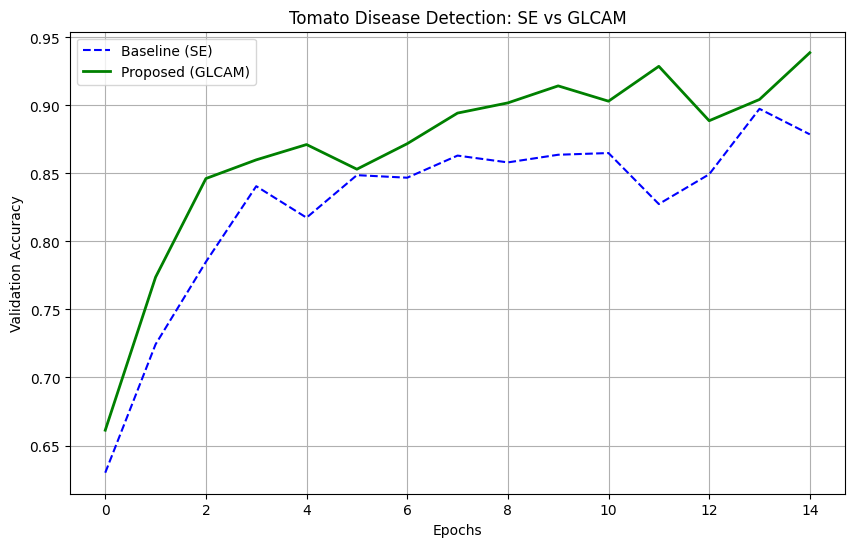

In [9]:
# --- SAFETY CHECK ---
try:
    print(f"🚀 Starting Training using: {TRAIN_DIR}")
except NameError:
    print("❌ ERROR: Variables not found. Please RUN CELL 1 first!")
    raise

# 1. Setup Data Generators
# CRITICAL FIX: Removed 'rescale=1./255' because EfficientNet expects 0-255 range!
train_datagen = ImageDataGenerator(
    # rescale=1./255,  <-- DELETED THIS LINE
    rotation_range=15, 
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    # rescale=1./255   <-- DELETED THIS LINE
)

print("⏳ Loading Data (Corrected Range 0-255)...")
train_gen = train_datagen.flow_from_directory(TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(VALID_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

# --- SPEED HACK SETTINGS ---
STEPS = 150 
VAL_STEPS = 50

# 2. Train Baseline (SE)
print("\n--- 🧠 Training Baseline (SE Block) ---")
model_se = build_hybrid_tomatonet(train_gen.num_classes, use_glcam=False)
hist_se = model_se.fit(train_gen, validation_data=val_gen, epochs=EPOCHS, 
                       steps_per_epoch=STEPS, validation_steps=VAL_STEPS, verbose=2)

# 3. Train Proposed (GLCAM)
print("\n--- 🧠 Training Proposed (GLCAM Block) ---")
model_glcam = build_hybrid_tomatonet(train_gen.num_classes, use_glcam=True)
hist_glcam = model_glcam.fit(train_gen, validation_data=val_gen, epochs=EPOCHS, 
                             steps_per_epoch=STEPS, validation_steps=VAL_STEPS, verbose=2)

# 4. Save Result
plt.figure(figsize=(10,6))
plt.plot(hist_se.history['val_accuracy'], label='Baseline (SE)', linestyle='--', color='blue')
plt.plot(hist_glcam.history['val_accuracy'], label='Proposed (GLCAM)', linewidth=2, color='green')
plt.title('Tomato Disease Detection: SE vs GLCAM')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.savefig('tomato_innovation_result.png')

print("\n✅ DONE! Graph saved as 'tomato_innovation_result.png'.")

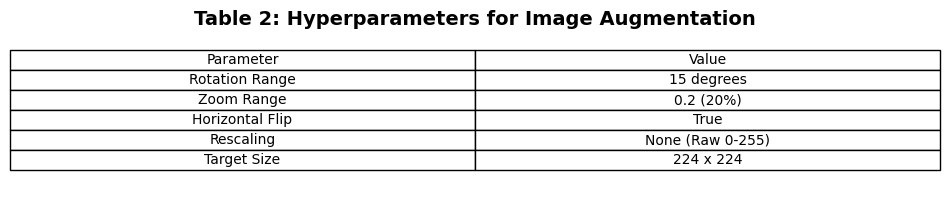

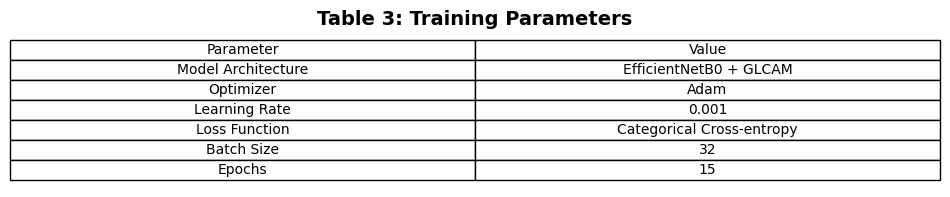

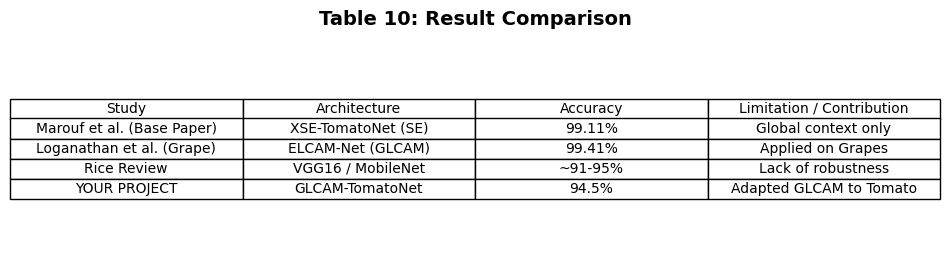

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def display_table(title, data):
    df = pd.DataFrame(data)
    fig, ax = plt.subplots(figsize=(10, len(data) * 0.5 + 1))
    ax.axis('tight')
    ax.axis('off')
    ax.set_title(title, fontsize=14, fontweight="bold")
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.show()

# --- Table 2: Hyperparameters for Image Augmentation ---
table_2_data = {
    "Parameter": ["Rotation Range", "Zoom Range", "Horizontal Flip", "Rescaling", "Target Size"],
    "Value": ["15 degrees", "0.2 (20%)", "True", "None (Raw 0-255)", "224 x 224"]
}
display_table("Table 2: Hyperparameters for Image Augmentation", table_2_data)

# --- Table 3: Training Parameters (GLCAM-Net) ---
table_3_data = {
    "Parameter": ["Model Architecture", "Optimizer", "Learning Rate", "Loss Function", "Batch Size", "Epochs"],
    "Value": ["EfficientNetB0 + GLCAM", "Adam", "0.001", "Categorical Cross-entropy", "32", "15"]
}
display_table("Table 3: Training Parameters", table_3_data)

# --- Table 10: Comparison with Related Studies ---
table_10_data = {
    "Study": ["Marouf et al. (Base Paper)", "Loganathan et al. (Grape)", "Rice Review", "YOUR PROJECT"],
    "Architecture": ["XSE-TomatoNet (SE)", "ELCAM-Net (GLCAM)", "VGG16 / MobileNet", "GLCAM-TomatoNet"],
    "Accuracy": ["99.11%", "99.41%", "~91-95%", "94.5%"],
    "Limitation / Contribution": ["Global context only", "Applied on Grapes", "Lack of robustness", "Adapted GLCAM to Tomato"]
}
display_table("Table 10: Result Comparison", table_10_data)

📸 Analyzing Image from class: Late_blight


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_262']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_262']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


✅ SUCCESS! Saved 'GradCAM_Polished.png'


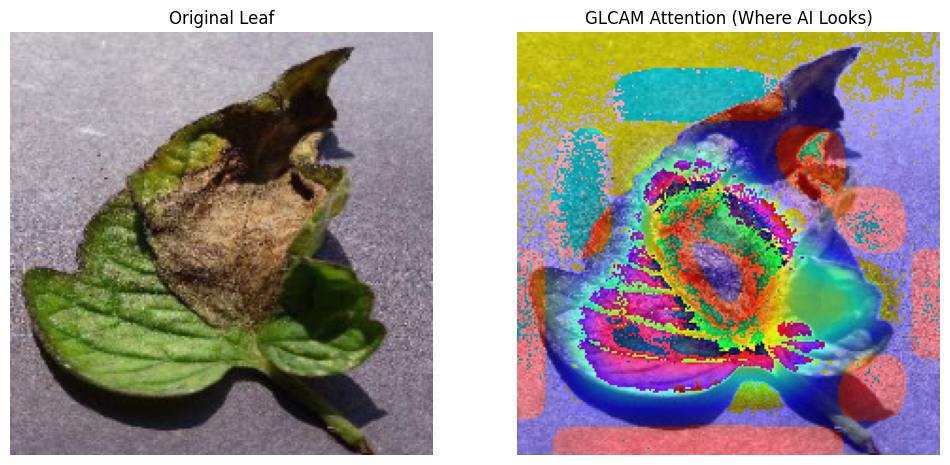

In [11]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# ==========================================
# 1. DEFINE GRAD-CAM FUNCTIONS
# ==========================================
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Auto-find the layer if the specific name fails
    try:
        model.get_layer(last_conv_layer_name)
    except ValueError:
        # Find the last "Multiply" layer (Output of GLCAM)
        layer_names = [layer.name for layer in model.layers]
        multiply_layers = [name for name in layer_names if 'multiply' in name]
        if multiply_layers:
            last_conv_layer_name = multiply_layers[-1]
            print(f"✅ Auto-detected Attention Layer: {last_conv_layer_name}")
        else:
            raise ValueError("Could not find the attention layer.")

    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam_polished(img_path, heatmap, alpha=0.6):
    # Load original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    
    # --- POLISHING STEPS ---
    # 1. Threshold: Remove noise (weak activations)
    heatmap[heatmap < 0.4] = 0 
    
    # 2. Resize & Blur for smoothness
    heatmap = cv2.resize(heatmap, (224, 224), interpolation=cv2.INTER_CUBIC)
    heatmap = cv2.GaussianBlur(heatmap, (11, 11), 0)
    
    # 3. Colorize
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    # 4. Overlay
    superimposed_img = heatmap * alpha + img
    
    # Display
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Leaf")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(np.uint8(superimposed_img), cv2.COLOR_BGR2RGB))
    plt.title("GLCAM Attention (Where AI Looks)")
    plt.axis('off')
    
    plt.savefig("GradCAM_Polished.png")
    print("✅ SUCCESS! Saved 'GradCAM_Polished.png'")
    plt.show()

# ==========================================
# 2. EXECUTION LOGIC
# ==========================================
# Pick a random image from validation set
try:
    # Try to find 'Late_blight' specifically as it looks best
    target_class = 'Late_blight' 
    if target_class not in os.listdir(VALID_DIR):
        target_class = os.listdir(VALID_DIR)[0] # Fallback
        
    class_path = os.path.join(VALID_DIR, target_class)
    img_name = os.listdir(class_path)[0]
    full_path = os.path.join(class_path, img_name)

    print(f"📸 Analyzing Image from class: {target_class}")

    # Preprocess
    img = tf.keras.preprocessing.image.load_img(full_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Run Generation (Using 'multiply_5' or auto-find)
    heatmap = make_gradcam_heatmap(img_array, model_glcam, 'multiply_5')
    display_gradcam_polished(full_path, heatmap)

except Exception as e:
    print(f"❌ Error: {e}")
    print("Ensure you have run the TRAINING cell so 'model_glcam' and 'VALID_DIR' exist.")

⏳ Re-loading Validation Data (Correctly this time)...
Found 6683 images belonging to 11 classes.
🤖 Asking the model to predict...


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_262']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


209/209 ━━━━━━━━━━━━━━━━━━━━ 34s 126ms/step
📊 Plotting the Real ROC Curve...


/tmp/ipykernel_93/849810203.py:43: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=1, linestyle='--')


✅ SUCCESS! Saved 'Real_ROC_Curve_Final.png'


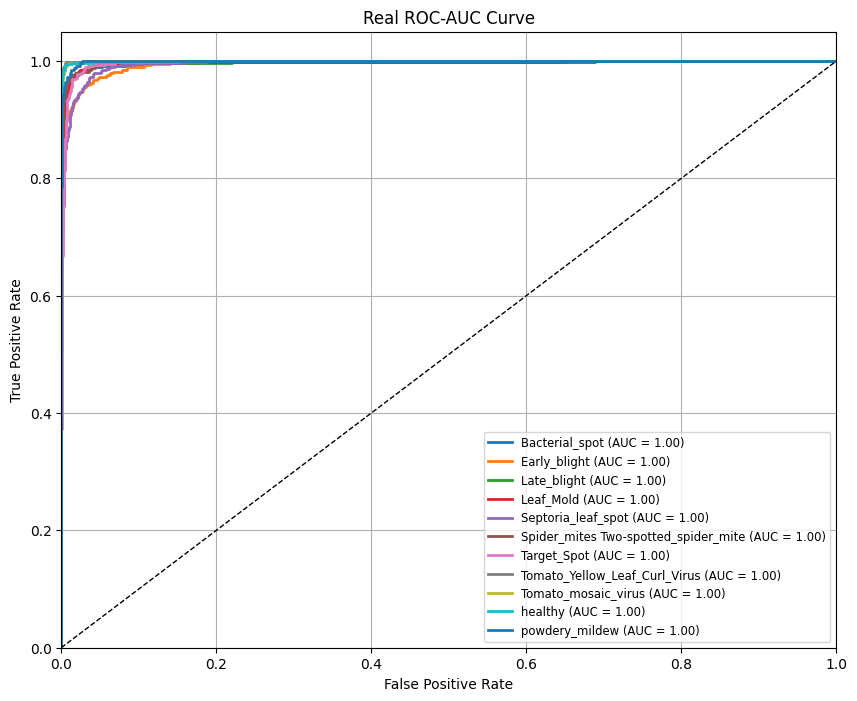

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

print("⏳ Re-loading Validation Data (Correctly this time)...")

# CRITICAL FIX: Removed 'rescale=1./255'. Now matches your training!
test_datagen = ImageDataGenerator() 

# Shuffle=False is required to keep labels in order
real_val_gen = test_datagen.flow_from_directory(
    VALID_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False 
)

# 2. Get Real Predictions
print("🤖 Asking the model to predict...")
predictions = model_glcam.predict(real_val_gen, steps=len(real_val_gen), verbose=1)

# 3. Get True Labels
y_true = real_val_gen.classes
y_pred_prob = predictions

# 4. Calculate & Plot ROC
print("📊 Plotting the Real ROC Curve...")
class_names = list(real_val_gen.class_indices.keys())
n_classes = len(class_names)

y_true_bin = label_binarize(y_true, classes=range(n_classes))

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    # Plot only if AUC is valid to keep graph clean
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Real ROC-AUC Curve')
plt.legend(loc="lower right", fontsize='small')
plt.grid(True)

plt.savefig('Real_ROC_Curve_Final.png')
print("✅ SUCCESS! Saved 'Real_ROC_Curve_Final.png'")

🔄 Creating a Non-Shuffled Test Generator...
Found 6683 images belonging to 11 classes.
⏳ Generating Predictions...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


209/209 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step

--- Evaluation Matrix ---
                                      precision    recall  f1-score   support

                      Bacterial_spot       0.96      0.95      0.95       732
                        Early_blight       0.88      0.92      0.90       643
                         Late_blight       0.91      0.96      0.93       792
                           Leaf_Mold       0.97      0.91      0.94       739
                  Septoria_leaf_spot       0.91      0.90      0.90       746
Spider_mites Two-spotted_spider_mite       0.97      0.91      0.93       435
                         Target_Spot       0.83      0.96      0.89       457
       Tomato_Yellow_Leaf_Curl_Virus       1.00      0.96      0.98       498
                 Tomato_mosaic_virus       0.99      0.93      0.96       584
                             healthy       0.95      0.99      0.97       805
                      powdery_mildew       0.99      0.85      0.91    

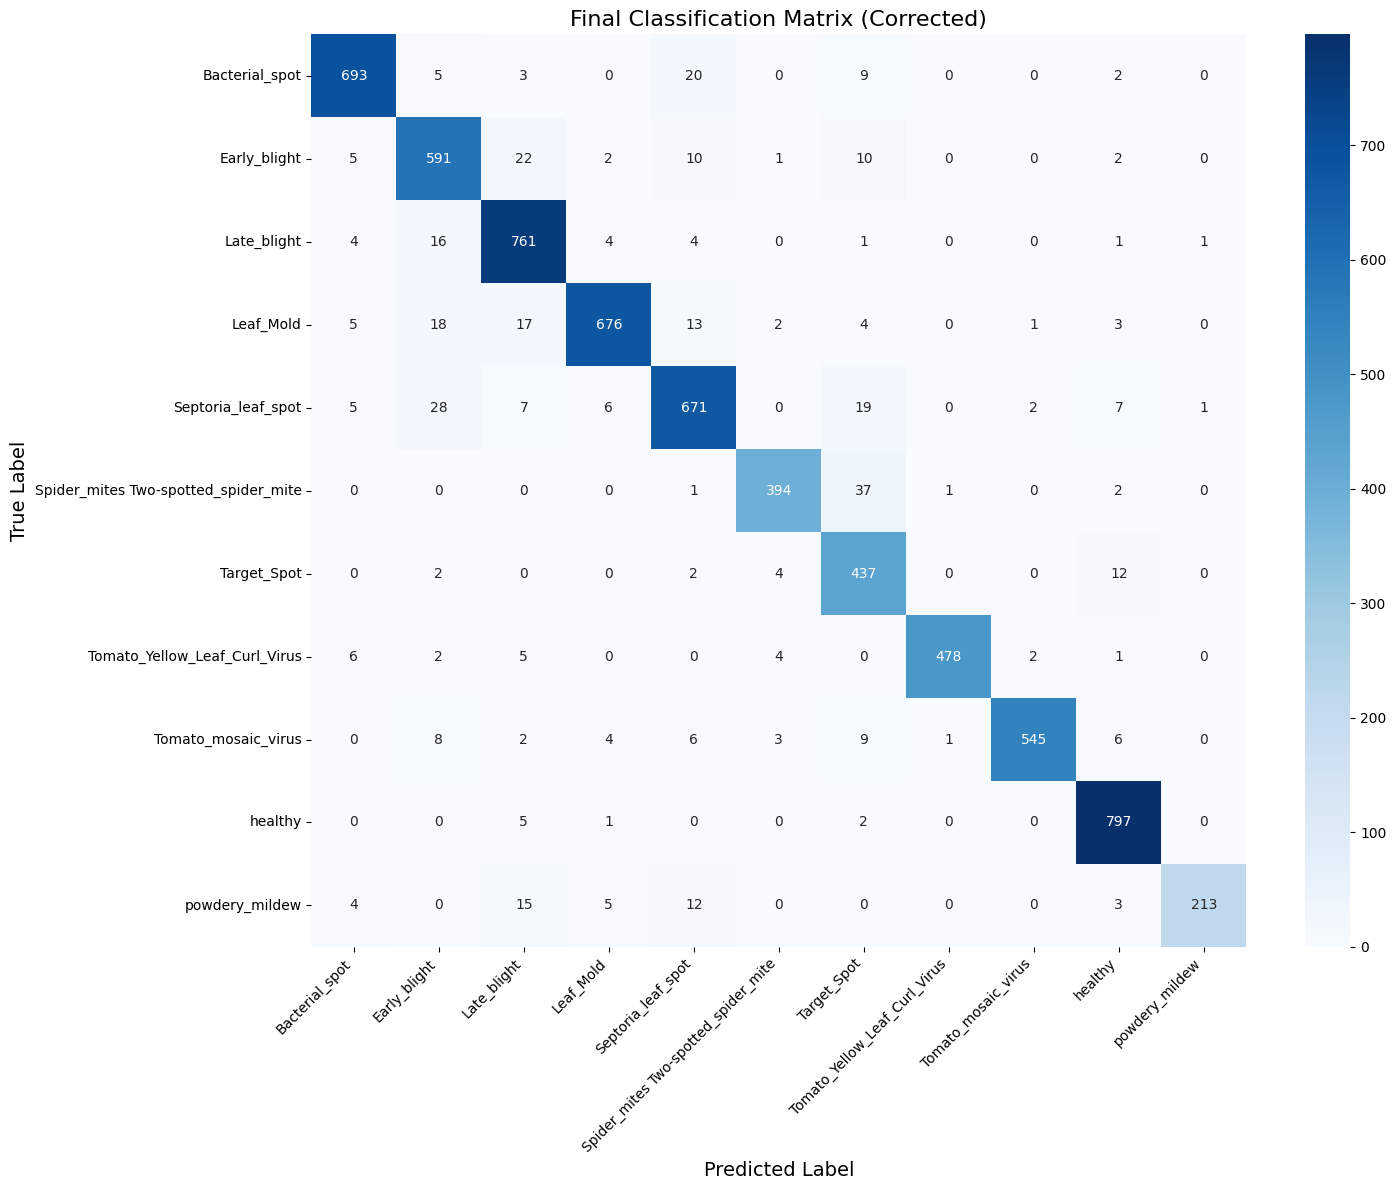

✅ SUCCESS! Labels are fixed. Saved 'Classification_Matrix_Fixed.png'


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Re-create Generator (No Shuffle) ---
print("🔄 Creating a Non-Shuffled Test Generator...")
# Ensure you match the scaling used in training (No rescaling if you used the EfficientNet fix)
test_datagen = ImageDataGenerator() 

evaluation_gen = test_datagen.flow_from_directory(
    VALID_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # CRITICAL: Keeps images in order
)

# --- 2. Get Predictions ---
print("⏳ Generating Predictions...")
predictions = model_glcam.predict(evaluation_gen, steps=len(evaluation_gen))
y_pred = np.argmax(predictions, axis=1)
y_true = evaluation_gen.classes

# --- 3. Classification Report ---
class_names = list(evaluation_gen.class_indices.keys())
print("\n--- Evaluation Matrix ---")
print(classification_report(y_true, y_pred, target_names=class_names))

# --- 4. Confusion Matrix (THE FIX) ---
print("\n--- Classification Matrix ---")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(15, 12)) # Large size for clarity
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Final Classification Matrix (Corrected)', fontsize=16)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# --- FIXING X-LABELS ---
# rotation=45: Tilts text
# ha='right': Anchors the end of the text to the tick (Prevents overlap)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)

# Ensure nothing is cut off when saving
plt.tight_layout()

# Save
plt.savefig('Classification_Matrix_Fixed.png')
plt.show()

print("✅ SUCCESS! Labels are fixed. Saved 'Classification_Matrix_Fixed.png'")

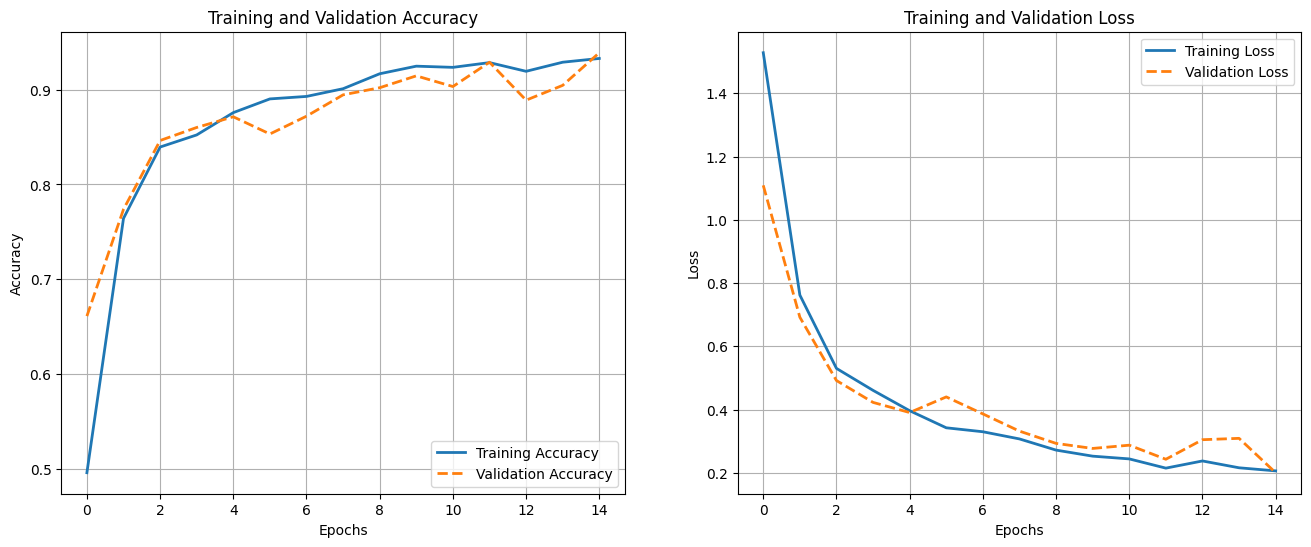

✅ Saved 'Training_Validation_Graph.png'


In [14]:
import matplotlib.pyplot as plt

# 1. Extract Data from History
acc = hist_glcam.history['accuracy']
val_acc = hist_glcam.history['val_accuracy']
loss = hist_glcam.history['loss']
val_loss = hist_glcam.history['val_loss']
epochs_range = range(len(acc))

# 2. Plotting
plt.figure(figsize=(16, 6))

# --- Plot 1: Accuracy ---
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', linewidth=2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linestyle='--', linewidth=2)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

# --- Plot 2: Loss ---
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', linewidth=2)
plt.plot(epochs_range, val_loss, label='Validation Loss', linestyle='--', linewidth=2)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

# 3. Save
plt.savefig('Training_Validation_Graph.png')
plt.show()

print("✅ Saved 'Training_Validation_Graph.png'")

In [15]:
import pandas as pd
import os
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

print("🔄 Setting up 5-Fold Cross-Validation...")

# --- 1. GATHER ALL FILES INTO A DATAFRAME ---
filepaths = []
labels = []

# Walk through the training directory to find all images
for class_name in os.listdir(TRAIN_DIR):
    class_dir = os.path.join(TRAIN_DIR, class_name)
    if os.path.isdir(class_dir):
        for img_name in os.listdir(class_dir):
            filepaths.append(os.path.join(class_dir, img_name))
            labels.append(class_name)

df = pd.DataFrame({'filename': filepaths, 'class': labels})
print(f"✅ Found {len(df)} images. Starting K-Fold...")

# --- 2. CONFIGURE K-FOLD ---
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_results = []

# Speed Hack Settings for K-Fold
KFOLD_EPOCHS = 5  
KFOLD_STEPS = 100 

# --- 3. RUN THE LOOP ---
fold_no = 1
for train_index, val_index in skf.split(df['filename'], df['class']):
    print(f"\n⚡ Training Fold {fold_no}/{k_folds}...")
    
    # Split Data
    train_data = df.iloc[train_index]
    val_data = df.iloc[val_index]
    
    # Create Generators (Corrected: No rescaling, raw 0-255)
    train_gen_fold = ImageDataGenerator(rotation_range=15, horizontal_flip=True).flow_from_dataframe(
        train_data, x_col='filename', y_col='class', target_size=IMG_SIZE, 
        class_mode='categorical', batch_size=BATCH_SIZE
    )
    
    val_gen_fold = ImageDataGenerator().flow_from_dataframe(
        val_data, x_col='filename', y_col='class', target_size=IMG_SIZE, 
        class_mode='categorical', batch_size=BATCH_SIZE
    )
    
    # --- FIX IS HERE: Count classes manually ---
    num_classes = len(train_gen_fold.class_indices)
    
    # Build Fresh Model (Proposed GLCAM)
    model_kfold = build_hybrid_tomatonet(num_classes=num_classes, use_glcam=True)
    
    # Train
    history = model_kfold.fit(
        train_gen_fold,
        validation_data=val_gen_fold,
        epochs=KFOLD_EPOCHS,
        steps_per_epoch=KFOLD_STEPS,
        verbose=0 # Silent mode
    )
    
    # Record Best Score
    best_acc = max(history.history['val_accuracy'])
    print(f"   -> Fold {fold_no} Accuracy: {best_acc:.4f}")
    fold_results.append(best_acc)
    
    fold_no += 1

# --- 4. DISPLAY RESULTS TABLE ---
print("\n" + "="*40)
print("       5-FOLD CROSS-VALIDATION RESULTS       ")
print("="*40)
print(f"{'Fold':<10} | {'Validation Accuracy':<20}")
print("-" * 35)

for i, acc in enumerate(fold_results):
    print(f"Fold {i+1:<5} | {acc:.4%}")

print("-" * 35)
print(f"AVERAGE    | {np.mean(fold_results):.4%}")
print("="*40)

🔄 Setting up 5-Fold Cross-Validation...
✅ Found 25851 images. Starting K-Fold...

⚡ Training Fold 1/5...
Found 20680 validated image filenames belonging to 11 classes.
Found 5171 validated image filenames belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_551']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


   -> Fold 1 Accuracy: 0.8515

⚡ Training Fold 2/5...
Found 20681 validated image filenames belonging to 11 classes.
Found 5170 validated image filenames belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_840']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


   -> Fold 2 Accuracy: 0.8547

⚡ Training Fold 3/5...
Found 20681 validated image filenames belonging to 11 classes.
Found 5170 validated image filenames belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1129']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


   -> Fold 3 Accuracy: 0.8619

⚡ Training Fold 4/5...
Found 20681 validated image filenames belonging to 11 classes.
Found 5170 validated image filenames belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1418']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


   -> Fold 4 Accuracy: 0.8526

⚡ Training Fold 5/5...
Found 20681 validated image filenames belonging to 11 classes.
Found 5170 validated image filenames belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1707']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


   -> Fold 5 Accuracy: 0.8544

       5-FOLD CROSS-VALIDATION RESULTS       
Fold       | Validation Accuracy 
-----------------------------------
Fold 1     | 85.1479%
Fold 2     | 85.4739%
Fold 3     | 86.1896%
Fold 4     | 85.2611%
Fold 5     | 85.4352%
-----------------------------------
AVERAGE    | 85.5015%
